In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('marketing_customer_analysis.csv')
df.shape
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [95]:
numerical = df.describe(include=[object]).T
numerical

,count,unique,top,freq
Customer,9134,9134,BU79786,1
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
Effective To Date,9134,59,1/10/11,195
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location Code,9134,3,Suburban,5779
Marital Status,9134,3,Married,5298


In [96]:
numerical = df.select_dtypes(include='number')
categorical = df.select_dtypes(include='object')

numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [97]:
categorical

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [98]:
numerical_columns = numerical.columns
numerical_columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

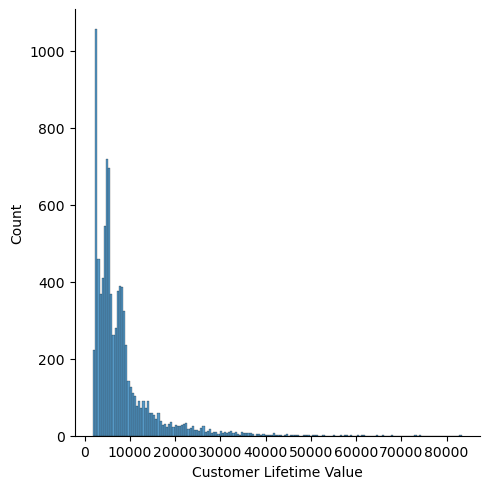

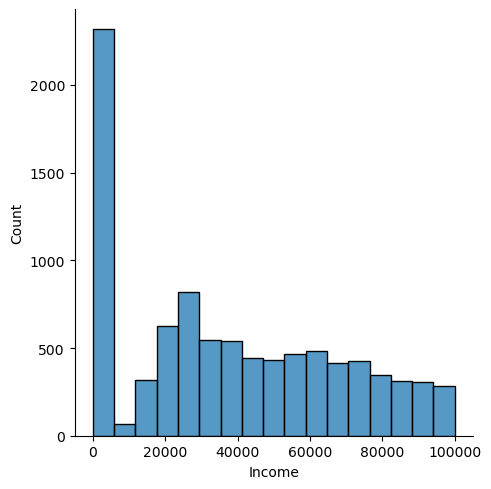

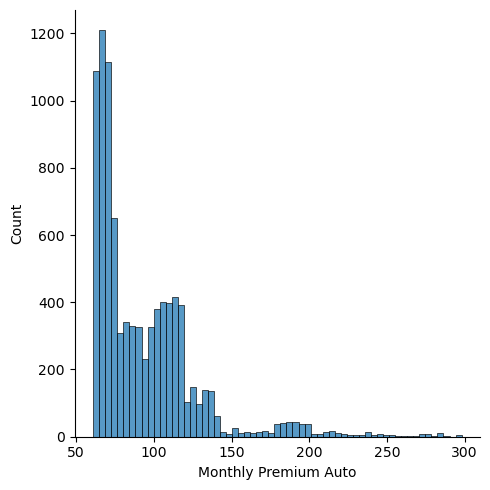

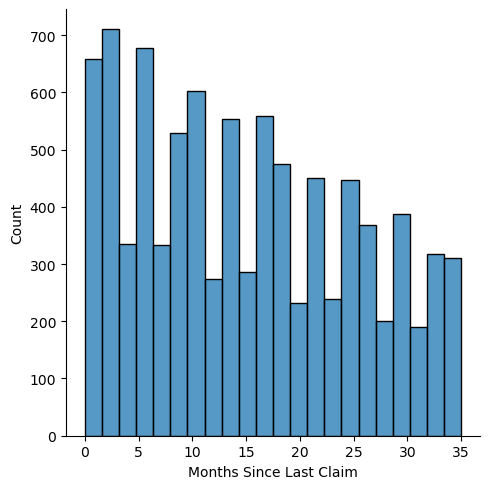

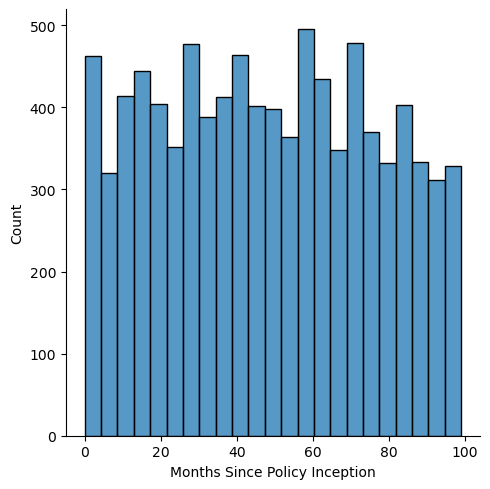

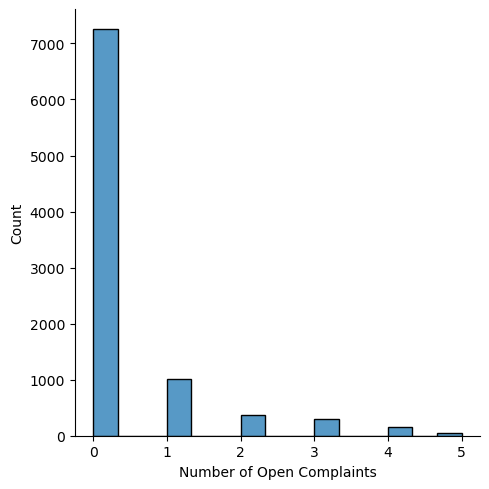

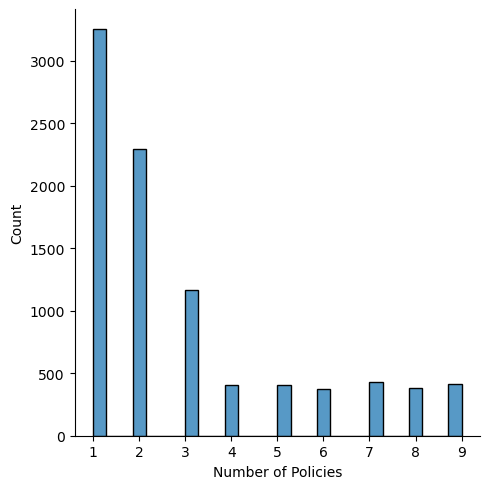

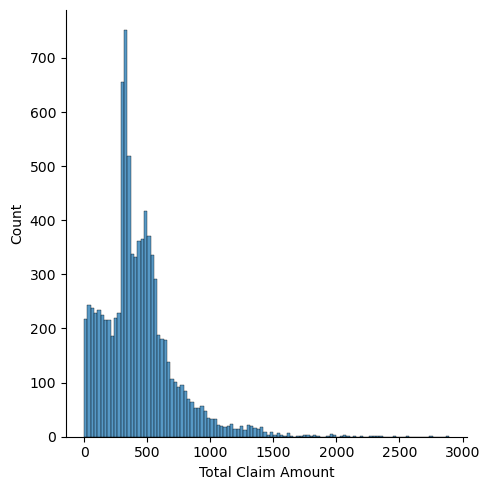

In [99]:
columns_to_plot = [
    'Customer Lifetime Value',
    'Income',
    'Monthly Premium Auto',
    'Months Since Last Claim',
    'Months Since Policy Inception',
    'Number of Open Complaints',
    'Number of Policies',
    'Total Claim Amount'
]

for column in columns_to_plot:
    sns.displot(df[column])
    plt.show()


In [100]:
#The only one that looks like a normal distribution is months since policy inception

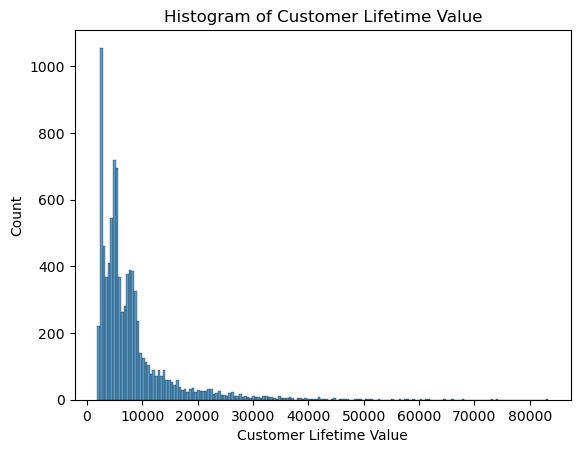

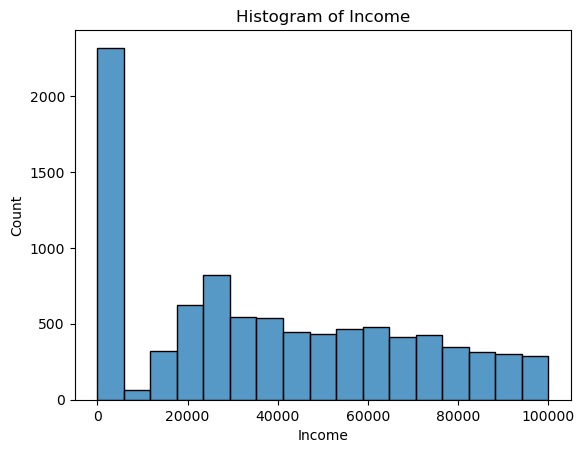

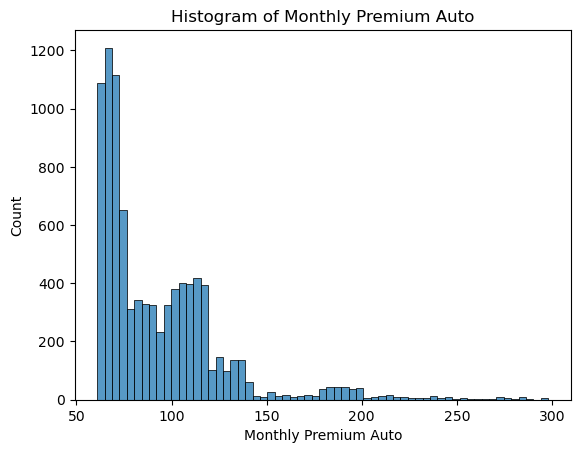

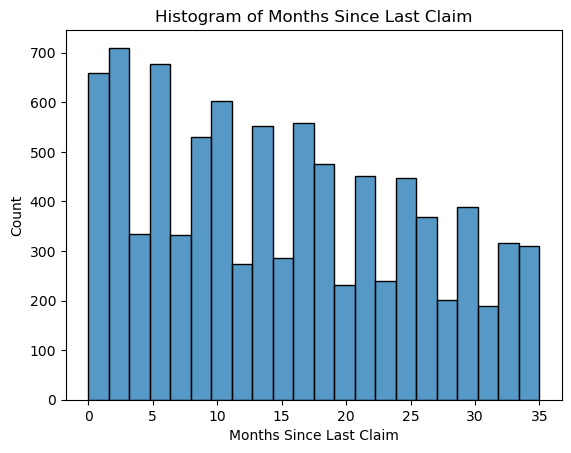

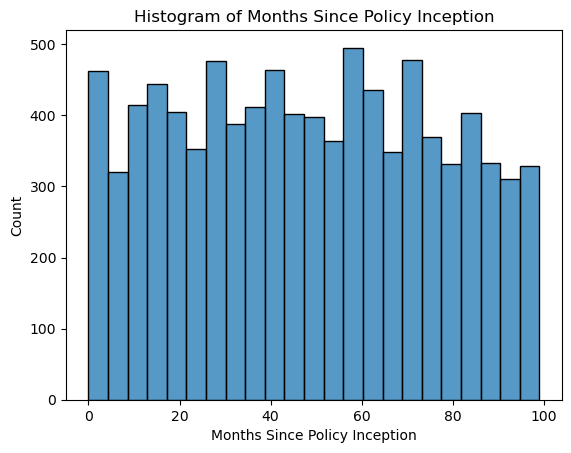

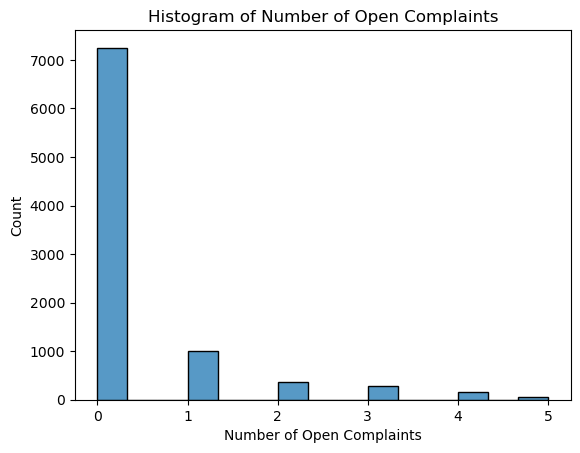

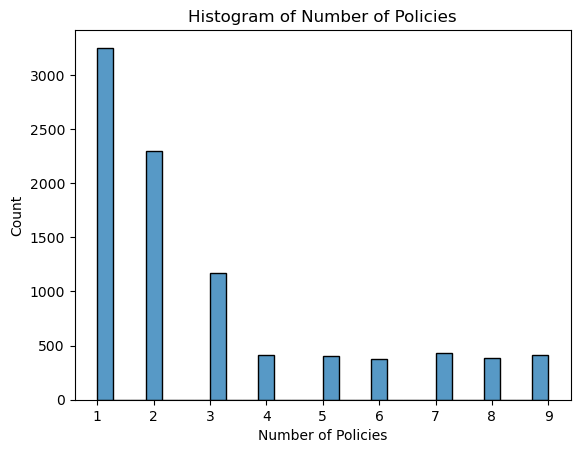

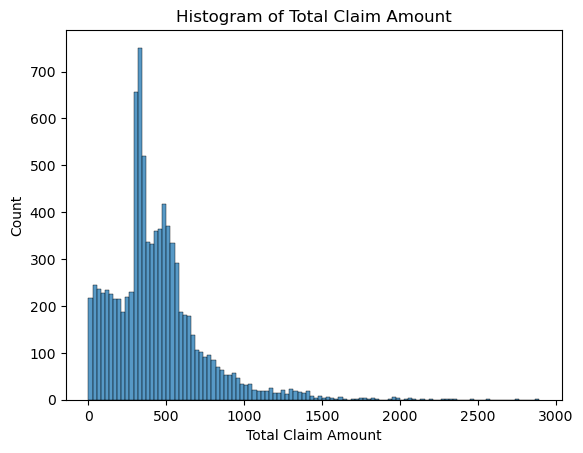

In [101]:

columns_to_plot = [
    'Customer Lifetime Value',
    'Income',
    'Monthly Premium Auto',
    'Months Since Last Claim',
    'Months Since Policy Inception',
    'Number of Open Complaints',
    'Number of Policies',
    'Total Claim Amount'
]


for column in columns_to_plot:
    sns.histplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.show()



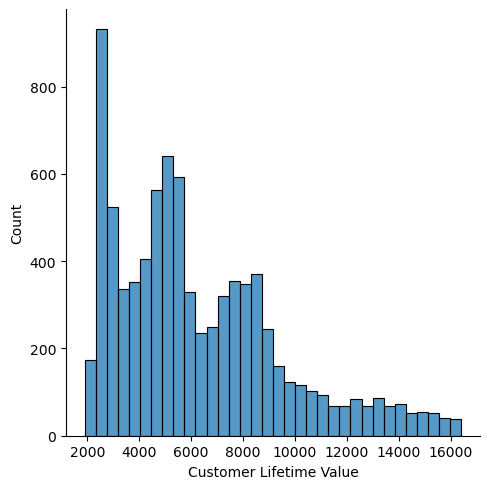

In [102]:
iqr = np.percentile(df['Customer Lifetime Value'],75) - np.percentile(df['Customer Lifetime Value'],25)
upper_limit = np.percentile(df['Customer Lifetime Value'],75) + 1.5*iqr
lower_limit = np.percentile(df['Customer Lifetime Value'],25) - 1.5*iqr

data1 = df[(df['Customer Lifetime Value']>lower_limit) & (df['Customer Lifetime Value']<upper_limit)].copy()
sns.displot(data1['Customer Lifetime Value'])
plt.show()

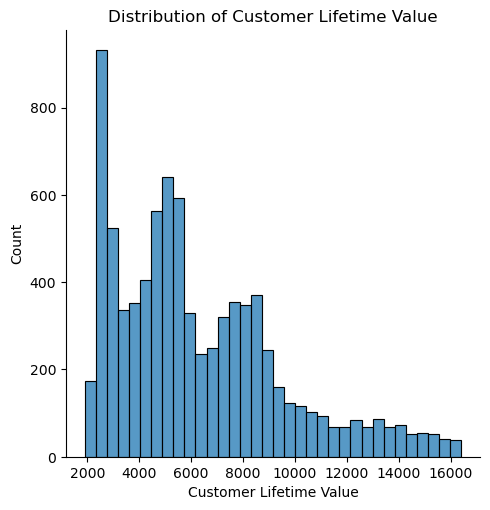

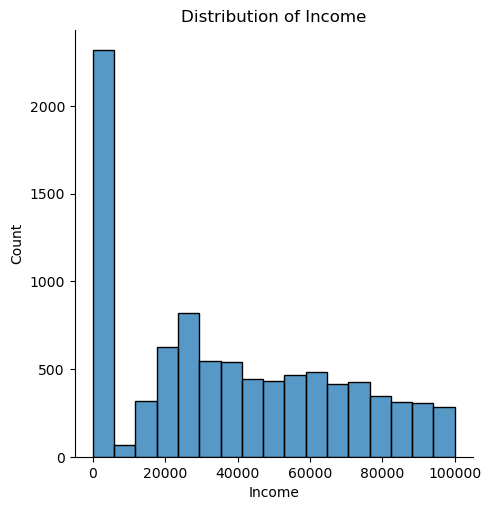

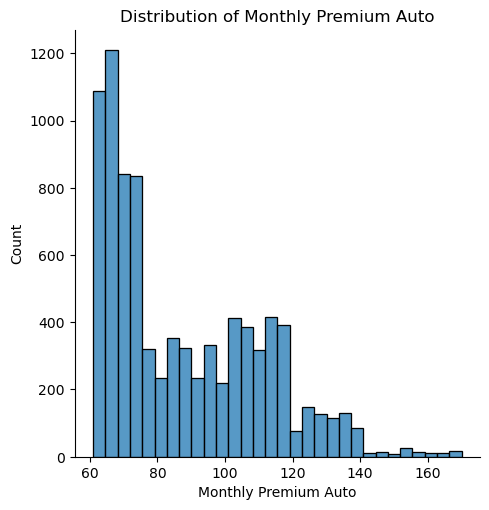

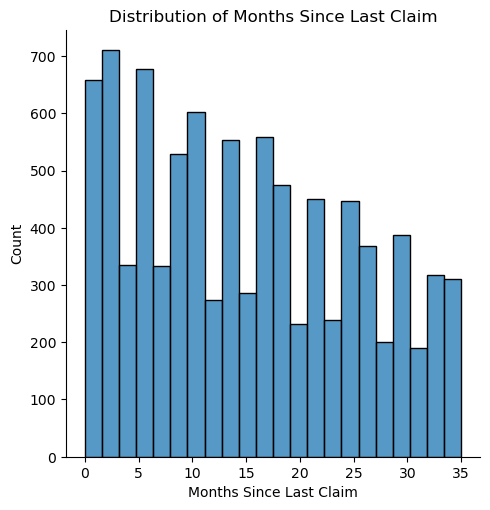

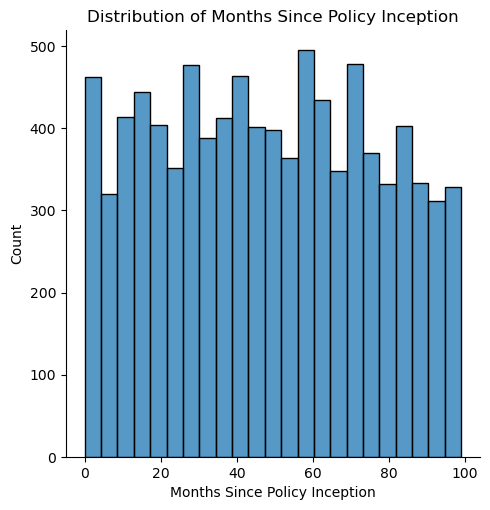

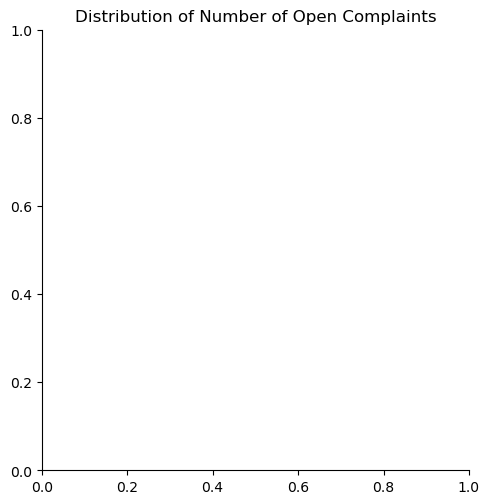

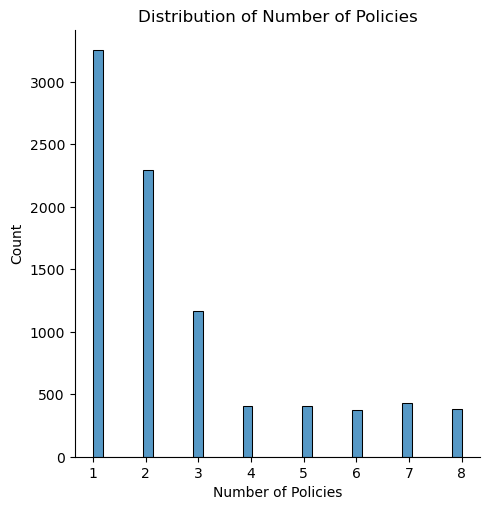

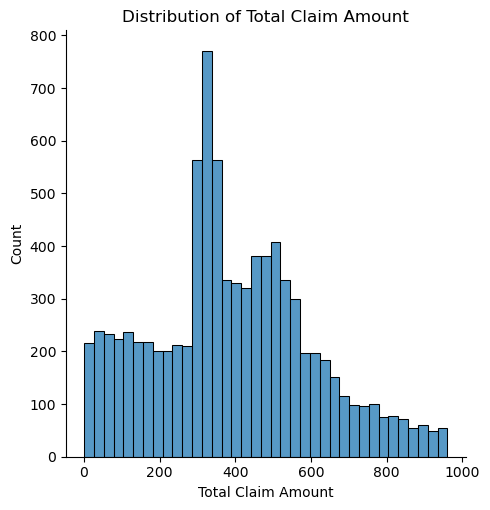

In [103]:
numerical_columns = numerical.columns

columns_to_process = numerical_columns

for col in columns_to_process:
    iqr = np.percentile(df[col], 75) - np.percentile(df[col], 25)
    upper_limit = np.percentile(df[col], 75) + 1.5 * iqr
    lower_limit = np.percentile(df[col], 25) - 1.5 * iqr

    data_filtered = df[(df[col] > lower_limit) & (df[col] < upper_limit)].copy()

    sns.displot(data_filtered[col])
    plt.title(f'Distribution of {col}')
    plt.show()


/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_7582/936296745.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = df.corr()


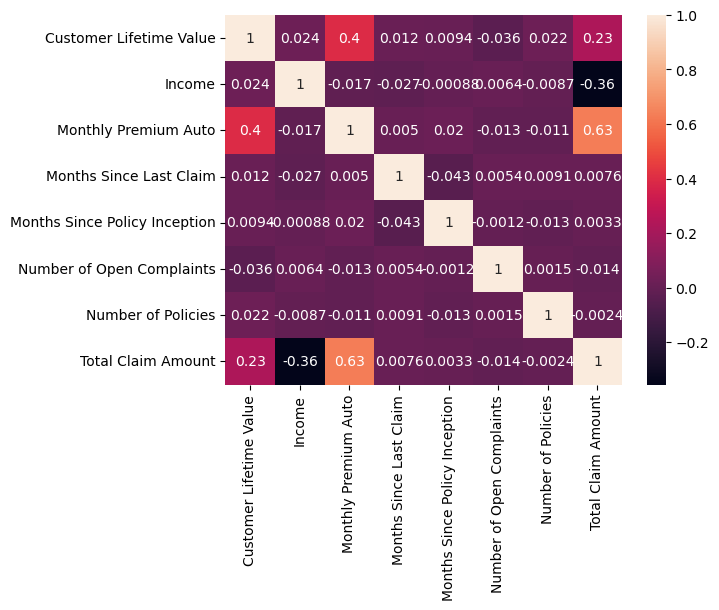

In [104]:
correlations_matrix = df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [105]:
-- END OF Lab | Customer Analysis Round 4 --

SyntaxError: invalid syntax (4116760595.py, line 1)

# Lab | Customer Analysis Round 5

In [ ]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

y = df['Total Claim Amount']
X = df.drop(['Total Claim Amount'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

X_num

In [ ]:
pd.DataFrame(x_normalized, columns=X_num.columns).corr()

In [106]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)

(9134, 7)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250


In [107]:
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns)

(9134, 7)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


In [108]:
pd.DataFrame(x_standardized, columns=X_num.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,4.006235e-17,1.000055,-0.888851,-0.583747,-0.323809,0.139322,10.962730
Income,9134.0,7.467933e-17,1.000055,-1.239617,-1.239617,-0.124032,0.811851,2.051587
Monthly Premium Auto,9134.0,-1.487752e-16,1.000055,-0.936442,-0.732989,-0.297020,0.458660,5.951875
Months Since Last Claim,9134.0,4.472981e-17,1.000055,-1.498803,-0.903134,-0.108908,0.784596,1.975934
Months Since Policy Inception,9134.0,1.003504e-16,1.000055,-1.722470,-0.862392,-0.002315,0.821926,1.825350
Number of Open Complaints,9134.0,7.623515e-17,1.000055,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
Number of Policies,9134.0,-1.361342e-17,1.000055,-0.822648,-0.822648,-0.404247,0.432555,2.524561
